<a href="https://colab.research.google.com/github/eg20204254/ImageRecognition/blob/main/Image_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 206M/218M [00:01<00:00, 201MB/s]
100% 218M/218M [00:01<00:00, 178MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/cat-and-dog.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#Importing the Keras Libraries and packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#Initialising the CNN
classifier =Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation ='relu'))

#Adding second convolutional layer(hidden layer)
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Step 3 -Flattening
classifier.add(Flatten())

#Step 4 -Full connection
classifier.add(Dense(units =128, activation= 'relu'))
classifier.add(Dense(units =1 ,activation= 'sigmoid'))


In [ ]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss= 'binary_crossentropy',metrics =['accuracy'])


In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range =0.2,
                                   zoom_range =0.2,
                                   horizontal_flip= True)

In [ ]:
training_set = train_datagen.flow_from_directory('training_set/training_set',
                                                 target_size =(64,64),
                                                 batch_size=32,
                                                 class_mode ='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('test_set/test_set',
                                                 target_size =(64,64),
                                                 batch_size=32,
                                                 class_mode ='binary')

Found 2023 images belonging to 2 classes.


In [ ]:
#Training the model
classifier.fit_generator(training_set,
                         steps_per_epoch =50,
                         epochs=5,
                         validation_data = test_set,
                         validation_steps =100)
#classifier.fit_generator(training_set,
   #                      steps_per_epoch =4000,
     #                    epochs=10,
      #                   validation_data = test_set,
       #                  validation_steps =10)


Epoch 1/5


<ipython-input-50-12e220a664a8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


50/50 [==============================] - ETA: 0s - loss: 0.7642 - accuracy: 0.5250

50/50 [==============================] - 17s 322ms/step - loss: 0.7642 - accuracy: 0.5250 - val_loss: 0.6825 - val_accuracy: 0.5447
Epoch 2/5
50/50 [==============================] - 11s 213ms/step - loss: 0.6857 - accuracy: 0.5519
Epoch 3/5
50/50 [==============================] - 11s 219ms/step - loss: 0.6701 - accuracy: 0.5962
Epoch 4/5
50/50 [==============================] - 11s 212ms/step - loss: 0.6508 - accuracy: 0.6344
Epoch 5/5
50/50 [==============================] - 10s 196ms/step - loss: 0.6348 - accuracy: 0.6456


1/1 [==============================] - 0s 25ms/step
dog


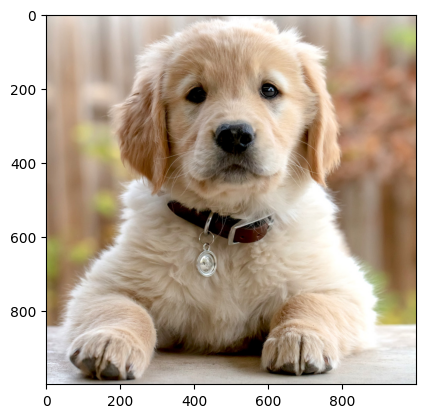

In [ ]:
#Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image =image.load_img('cat.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result =classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction ='dog'
else:
  prediction= 'cat'
print(prediction)



import matplotlib.pyplot as plt
import seaborn as sns


img= plt.imread("dog.jpg")
plt.imshow(img)